<a href="https://colab.research.google.com/github/Balajilp/Time_Series_EDA_Forecastings/blob/main/Time_Series_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Install Pandas Data Reader
!pip install pandas-datareader

In [5]:
# we must update pandas and pandas data_reader in order to use otherwise it will give us error
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 7.9 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
# importing the necessary libraries
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
# loading the Tesla Data 
df_tesla=pdr.get_data_yahoo('TSLA')

# printing the top 5 records
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999


## simple moving average

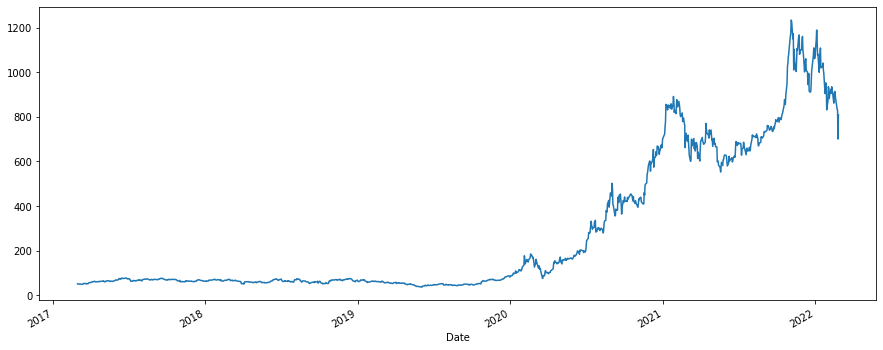

In [4]:
df_tesla['Open'].plot(figsize=(15, 6))

In [5]:
df_tesla['open_rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()

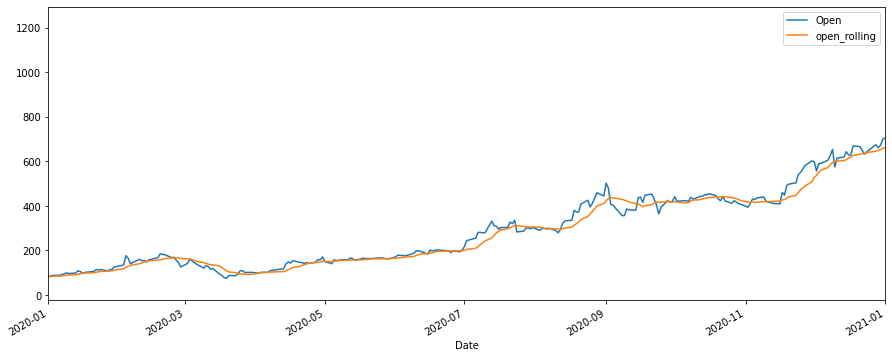

In [8]:
df_tesla[['Open', 'open_rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize=(15,6))

In [12]:
df_tesla['open_30_rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()

In [13]:
df_tesla['open_50_rolling'] = df_tesla['Open'].rolling(window=50, min_periods=1).mean()

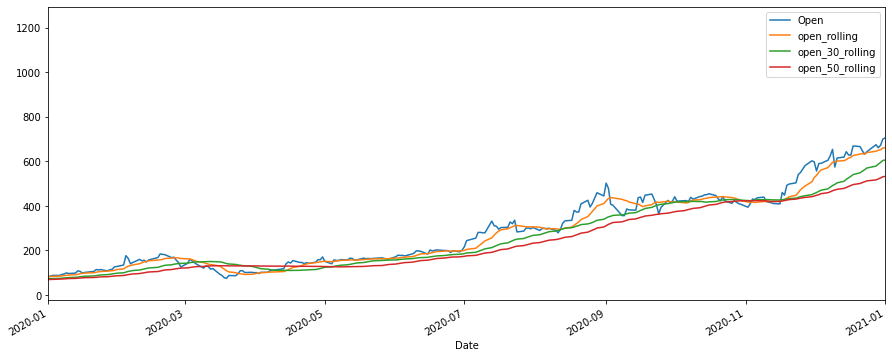

In [14]:
df_tesla[['Open', 'open_rolling', 'open_30_rolling', 'open_50_rolling']].plot(xlim = ['2020-01-01','2021-01-01'], figsize=(15,6))

### Dissadvantages of Simple Moving Average:
1. Similar importance to all the Data.  In time series analysis we want to give importance to recent observations.


## Cummulative moving average

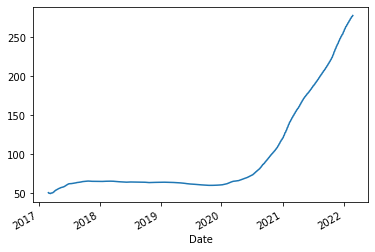

In [15]:
## Expanding function helps us to do cummulative moving average
df_tesla['Open'].expanding().mean().plot()

## Exponential moving average(EMA)

In [16]:
df_tesla['EMA_0.1'] = df_tesla['Close'].ewm(alpha=0.1, adjust=False).mean()

In [17]:
df_tesla['EMA_0.3'] = df_tesla['Close'].ewm(alpha=0.3, adjust=False).mean()

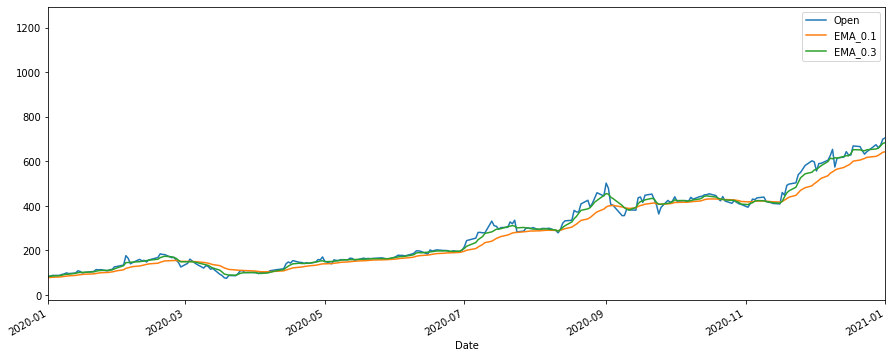

In [18]:
df_tesla[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim = ['2020-01-01','2021-01-01'], figsize=(15,6))

## Exponential Weighted Moving Average

In [20]:
# with the help of span parameter we can do ewma usng ewm()
df_tesla['ewma_5days'] = df_tesla['Close'].ewm(span=5).mean() # span means number of days we want to calculate ewma

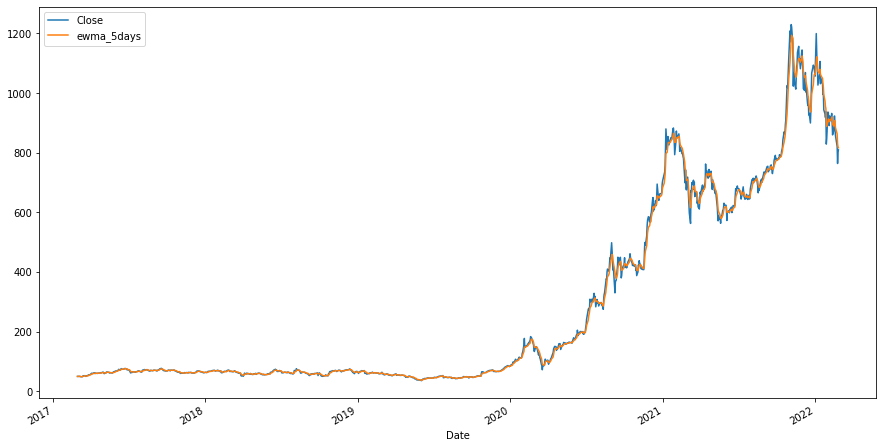

In [22]:
df_tesla[['Close', 'ewma_5days']].plot(figsize=(15, 8))